## Babylonian Method

The Babylonian (or Heron’s) method for computing the square root of 
$a\in\mathbb{R}^{+}$ is summarised by the iterative sequence $(x_{n})$, where $x_{0}$ is an arbitrary starting value (ideally, $x_{0}\approx\sqrt{a}$, but this is not required) and 
$$
x_{n+1}=\frac{1}{2}\left(x_{n}+\frac{a}{x_{n}}\right).
$$

Successive values are computed for $x_{n}$ until the desired level of accuracy is reached. Hence, if we desire the maximum error to be $e$, we stop when $n=N$, where 
$$
\left|x_{N}^{2}-a\right|<e.
$$

**a)**

Write a Python function called ‘babylonian_square_root' that 
- Takes as input three numbers $a$, $e$ and $x_{0}$. 
- Raises an assertion error if $a$ or $e$ are not positive numbers.
- Uses the Babylonian method to estimate $\sqrt{a}$ with maximum error $e$. 
- Returns the tuple $(x_{N},N)$ where $x_{N}$ is the sought approximation.

In [1]:
def babylonian_square_root(a,e,x0):
    assert a>0,"input value (a) is invalid"
    assert e>0,"input value (e) is invalid"
    N=0
    difference = abs(x0**2-a)
    if difference<e:
        print(x0)
    else:
        while difference>e:
            if x0>0:
                x0=1/2*(x0+a/x0)
                difference = abs(x0**2-a)
                N+=1
            else:
                x0=1/2*(-x0+a/-x0)
                difference = abs(-x0**2-a)
                N+=1  
                
            if difference<e:
                t=[x0,N]
                return tuple(t)

**b)** 
Write a modified function that returns the whole list of approximations $[x_0,x_1,x_2,\ldots,x_n]$ 

In [2]:
def babylonian_square_root_list(a,e,x0):
    assert a>0,"input value (a) is invalid"
    assert e>0,"input value (e) is invalid"
    N=0
    L=[x0]
    difference = abs(x0**2-a)
    if difference<e:
        print(x0)
    else:
        while difference>e:
            if x0>0:
                x0=1/2*(x0+a/x0)
                difference = abs(x0**2-a)
                N+=1
                L.append(x0)
            else:
                x0=1/2*(-x0+a/-x0)
                difference = abs(-x0**2-a)
                N+=1 
                L.append(x0)
            if difference<e:
                return L

**c)** Use the function from part b) to compute a list of approximations $(x_n)$ to $\sqrt{20000}$ and use **pylab** to plot the points $x_n$ against $n$ as a scatterplot and in the same plot also add a horizontal red line corresponding to the value given by `math.sqrt(20000)` as well as appropriate legends for the plot and labels for the $x$ and $y$ axes. Please insert the plot in the cell below the function definition. 

In [3]:
import pylab
def draw_plot(a):
    data = babylonian_square_root_list(a,1e-10,1)
    ys= data
    xs=[x for x in range(len(ys))]
    pylab.hlines(y = data[-1], xmin = 0, xmax = len(data),label="Value of sqrt(a)",COLOR='red')
    
    pylab.scatter(xs,ys, label="Xn values ")
    
    pylab.legend(loc='upper right')
    pylab.xlabel('n')
    pylab.ylabel('Xn')
    pylab.show()

<ipython-input-3-100576c4b4d6>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  pylab.hlines(y = data[-1], xmin = 0, xmax = len(data),label="Value of sqrt(a)",COLOR='red')


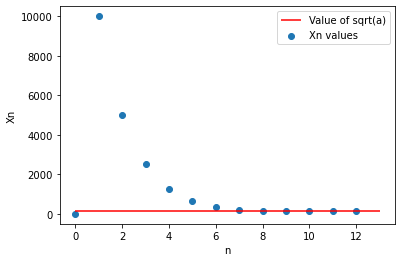

In [4]:
draw_plot(20000)

## Bernoulli numbers
The Bernoulli numbers $B_{m}$, where $m=0,1,2,\ldots$ are a sequence of rational numbers with many applications. 
The $m$th Bernoulli number can be defined explicitly by 
$$
B_{m}=\sum_{k=0}^{m}\sum_{v=0}^{k}(-1)^{v}{k \choose v}\frac{v^{m}}{k+1}.
$$
It is easy to see that $B_0=1$ and it can be shown that $B_{m}=0$ for any odd $m>1$ and the first few non-zero values are

$$
B_0=1,\quad B_1=-\frac{1}{2},\quad B_2=\frac{1}{6}=0.166666\ldots, \quad B_4=-\frac{1}{30}=-0.033333\cdots
$$
**a)** Write a program which uses the formula above to compute the Bernoulli number $B_{m}$ for $0\le m\le 12$. 

Note that without using higher precision this algorithm is not very good for large $m$ due to catastrophic cancellation.


In [5]:
import math
def bernoulli(m):
    r"""
    A function that uses the `sum` formula to compute $B_m$
    """
    if m == 0:
        b=1
        return b
    elif m==1:
        b=-0.5
        return b
    elif m>1 and m%2==1:
        b=0
        return b
    else:
        bm =sum(math.comb(m, k) * bernoulli(k) / (m - k + 1) for k in range(0,m)) 
        return -bm - 0.0000000000000001

## Mclaurin Series

**b)**
The first n terms of the Maclaurin series of tan x are given by 

$$
p_n(x) = \sum_{k=1}^{n} \frac{B_{2k}}{(2k)!}(−4)^k(1 − 4^k)x^{2k−1}
$$
Write a function to calculate $p_n(x)$ that works for at least $n=1,2,3$

In [6]:
def pn(n,x):
    r"""
    Function that computes the $n$-th McLaurin polynomials for $\tan$ at the point $x$. 
    """
    t=sum( (bernoulli(2*n)) * ((-4)**n) * (1 - 4**n) * (x ** (2*n - 1))  / (math.factorial(2*n)) for n in range(1,n+1))
    return t

## Tan Plot 
Plot the graphs of $\tan(x)$, $p_1(x)$, $p_2(x)$ and $p_3(x)$ in the range 
$-\frac{\pi}{3}\le x\le \frac{\pi}{3}$
in the same figure. The figure should have a legend that explains what each of the graphs represent as well as labels for the $x$ and $y$ axes. Please insert the plot in the cell below the function definition.

In [8]:
import pylab
def draw_pn_plot():
    r"""
    Function that plots the graphs of \tan, p_1 and p_3
    """
    xp= pylab.linspace(-(pylab.pi/3),pylab.pi/3,100)
    y1= pn(1,xp)
    y2= pn(2,xp)
    y3= pn(3,xp)
    y4= pylab.tan(xp)
    pylab.plot(xp,y1,label="p_1(x)")
    pylab.plot(xp,y2,label="p_2(x)")
    pylab.plot(xp,y3,label="p_3(x)")
    pylab.plot(xp,y4,label="tan(x)")
    pylab.legend(loc='upper right')
    pylab.xlabel('x')
    pylab.ylabel('y')
    pylab.show()

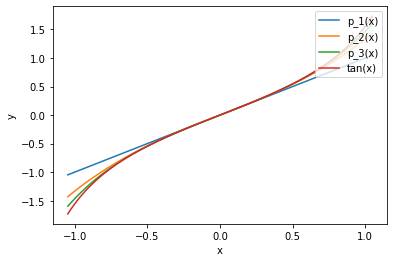

In [9]:
draw_pn_plot()

## Geometry

For this question we will deal with geometry of the plane and we will use tuples to denote points and vectors. 
More precisely, if $\bf{v}$ is a vector or point in the plane we represent it by the tuple of coordinates $\bf{v}=(x,y)$. A similar representation can of course be used for vectors in arbitrary dimensions. 

We know that a straight line $L$ in the plane is uniquely determined by either of the following:

- Two different points $P$ and $Q$ that lie on the line. 
- A point $P$ on the line together with a direction vector $\bf{v}$

and we will make use of both of these definitions. 


**a)** Write a function that computes the scalar product of two vectors of arbitrary but equal length.  
           The function should Raise an assertion error if the input are not tuples of equal length containing integers or floats 


In [10]:
def scalar_product(v1,v2):
    r"""
    Calculate the scalar (dot) product between two vectors, v1 and v2, of arbitrary length.
    """
    import numpy as np
    assert (isinstance(v1,tuple) and isinstance(v2,tuple)), "v1 and v2 must be tupples"
    assert len(v1)==len(v2), "the length of v1 and v2 must be equal"
    assert (all(isinstance(x, int) for x in v1) and all(isinstance(x, int) for x in v2)) or (all(isinstance(x, float) for x in v1) and all(isinstance(x, float) for x in v2)), "v1 and v2 should consist of floats or ints"
    sp= np.dot(v1,v2)
    return sp
    

**b)** Write a program that takes as input two points $P$ and $Q$ in the plane and returns a vector that is perpendicular to the line through $P$ and $Q$ and has length equal to 1 

In [11]:
def vector_perpendicular(P,Q):
    """
    Find a vector that is perpendicular to the line between two points P and Q in the plane.  
    """
    import numpy as np
    
    if np.dot(P,Q)==0:
        return P
    elif len(P)==len(Q)==3:
        c= np.cross(P,Q)
        return c
    else :
        dy=(Q[1]-P[1])
        dx=(Q[0]-P[0])
        c= (dy,-dx)
        return c

## Intersection between two lines 

Write a function that computes the point of intersection between two lines in the plane given in the format (P,v) where P is a point and v a vector (both given by tuples of length 2). If the lines are parallell then the function should raise an AssertionError. 

Hint: If we are given the lines in parameter format
$$
L_1: s\mapsto  P_1 + s\mathbf{v_1} \quad L_2: t\mapsto P_2 + t\mathbf{v_2}
$$
then we need to solve the linear system of equations $L_1(s)=L_2(t)$ for $s$ and $t$.
If $P_i=(a_i,c_i)$ and $\mathbf{v}_i = (b_i,d_i)$ then the system of equations take the form:
$$
   a_1 + b_1 s = a_2 + b_2 t\\
   c_1 + d_1 s = c_2 + d_2 t
$$
and the aim is to find $s$ and $t$ in terms of the other coefficients. 
You also need to find out how you can tell from the coefficients if the two lines are parallel or not

In [12]:
def intersection_lines(L1,L2):
    """
    Find the intersection point of the two lines L1 and L2 given by two tuples L1=(P1,v1) and L2=(P2,v2) 
    where the points P1, P2 and the vectors v1 and v2 are all represented by tuples of length 2. 
    
    If the vectors v1 and v2 are parallell then we raise an assertion error. 
    """
    import numpy as np
    dy1=(L1[1][1])*(L2[1][0])
    dy2=(L2[1][1])*(L1[1][0])
    assert dy1 != dy2, "lines are parallel"
    Q1=[]
    b1=L1[1][0]
    b2=L2[1][0]
    d1=L1[1][1]
    d2=L2[1][1]
    a= int(L2[0][0]-L1[0][0])
    c= int(L2[0][1]-L1[0][1])
    A=np.array([[b1,-b2],[d1,-d2]])
    B=np.array([[a],[c]])
    X=list(np.linalg.solve(A,B))
    a1=int(L1[0][0])
    c1=int(L1[0][1])
    xx= a1+ b1 * X[0]
    yy= c1+ d1* X[0]
    xlist=np.array(xx).tolist()
    ylist=np.array(yy).tolist()
    Q1.extend(xlist)
    Q1.extend(ylist)
    return(Q1)